## Decision Tree (Binary classification)

### import required package

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### read data from source and describing

In [2]:
df = pd.read_csv('social_network_ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
print(df.columns)

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')


In [4]:
print(df.describe())

            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000


In [5]:
## chec for data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None


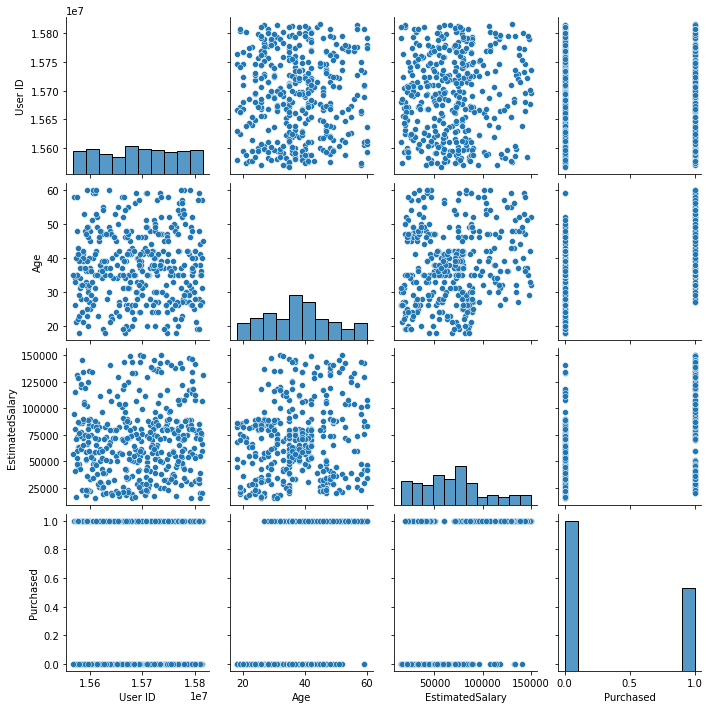

In [6]:
sns.pairplot(df)

### check the relation between variables

In [7]:
corr = df.corr()
corr.style.background_gradient(cmap = 'Greens')

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


### select input and op variable

In [9]:
x = df.drop(['User ID','Gender','Purchased'], axis=1)
y = df['Purchased']

### split the data


In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 123456, train_size= 0.8)

### creating a model

In [22]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy')

In [23]:
## fit the data
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

### parameters to fine tune model

In [13]:
print(model.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


### predict the values for unseen data

In [24]:
y_prediction = model.predict(x_test)
#print(y_prediction)


### evaluation of classification model

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_prediction)
print(cm)

[[51  5]
 [ 6 18]]


In [26]:
correct = cm[0,0] + cm[1,1]
wrong = cm[1,0] + cm[0,1]
total = correct + wrong
accuracy = correct/total
print(accuracy)

0.8625


In [27]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_prediction))

0.8625


### precision value

In [28]:
from sklearn.metrics import precision_score
print(precision_score(y_test, y_prediction))


0.782608695652174


### recal value

In [29]:
from sklearn.metrics import recall_score
print(recall_score(y_test, y_prediction))


0.75


### F1 score

In [30]:
from sklearn.metrics import f1_score
print(f1_score(y_test, y_prediction))

0.7659574468085107


### classification report

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        56
           1       0.78      0.75      0.77        24

    accuracy                           0.86        80
   macro avg       0.84      0.83      0.83        80
weighted avg       0.86      0.86      0.86        80



In [32]:
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve

print(roc_auc_score(y_test, y_prediction))

0.8303571428571429


[0.         0.01785714 1.        ]
[0.         0.58333333 1.        ]
[2 1 0]


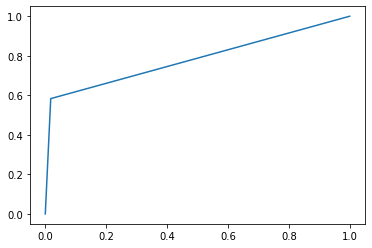

In [82]:
fpr, tpr, threshold = roc_curve(y_test, y_prediction)
print(fpr)
print(tpr)
print(threshold)
plt.plot(fpr, tpr)

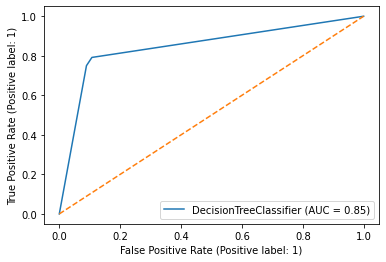

In [33]:
plot = plot_roc_curve(model, x_test, y_test)
plt.plot([0,1], [0,1], linestyle = '--')

### visualization

[Text(145.33777173913043, 208.38, 'X[0] <= 44.5\nentropy = 0.952\nsamples = 320\nvalue = [201, 119]'),
 Text(72.78260869565217, 190.26, 'X[1] <= 89500.0\nentropy = 0.648\nsamples = 223\nvalue = [186, 37]'),
 Text(36.391304347826086, 172.14, 'X[0] <= 36.5\nentropy = 0.208\nsamples = 183\nvalue = [177, 6]'),
 Text(29.11304347826087, 154.01999999999998, 'entropy = 0.0\nsamples = 124\nvalue = [124, 0]'),
 Text(43.66956521739131, 154.01999999999998, 'X[1] <= 67500.0\nentropy = 0.474\nsamples = 59\nvalue = [53, 6]'),
 Text(36.391304347826086, 135.89999999999998, 'entropy = 0.0\nsamples = 32\nvalue = [32, 0]'),
 Text(50.947826086956525, 135.89999999999998, 'X[1] <= 70500.0\nentropy = 0.764\nsamples = 27\nvalue = [21, 6]'),
 Text(43.66956521739131, 117.77999999999999, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(58.22608695652174, 117.77999999999999, 'X[1] <= 83500.0\nentropy = 0.706\nsamples = 26\nvalue = [21, 5]'),
 Text(50.947826086956525, 99.66, 'X[1] <= 79500.0\nentropy = 0.634\ns

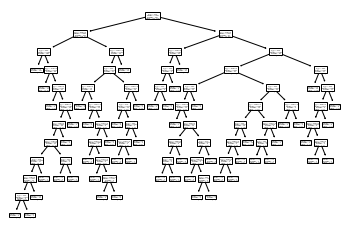

In [34]:
from sklearn.tree import plot_tree
plot_tree(model)

In [35]:
import graphviz 
from sklearn import tree
file = open("tree.png", "w")
dot_data = tree.export_graphviz(model, out_file=None, 
                     feature_names=x_test.columns, 
                     filled=True, rounded=True,  
                     special_characters=True)  


graph = graphviz.Source(dot_data)  
graph.format = 'png'
graph.render('dtree_render',view=True)
# graph
file.close()